In [49]:
%matplotlib inline

# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs

In [3]:
# Load the dataset.
file_path = "./resources/listings_cleaned.csv"
ab21_df = pd.read_csv(file_path,index_col=0)
ab21_df.head(5)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,
958,7/31/2008,within a few hours,100%,1,1,1,1,Western Addition,Apartment,Entire home/apt,...,STR-0001256,1,1,1,0,0,1.60,3958,4+ years,17.0
7918,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,Private room,...,NaN,0,9,0,9,0,0.14,3637,4+ years,923.0
8142,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,Private room,...,NaN,0,9,0,9,0,0.14,3637,4+ years,263.0
8339,7/2/2009,within an hour,100%,0,2,2,1,Western Addition,House,Entire home/apt,...,STR-0000264,0,2,2,0,0,0.23,3622,4+ years,295.0
8739,1/27/2009,within an hour,100%,1,2,2,0,Mission,Other,Private room,...,STR-0000028,1,2,0,2,0,5.61,3778,4+ years,12.0


In [5]:
#get list of column name
list(ab21_df.columns.values)

['host_since',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'first_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'host_days_active',
 'time_since_first_review',
 'time_since_last_review']

In [121]:
ab21_df.dtypes

host_since                                       object
host_response_time                               object
host_response_rate                               object
host_is_superhost                                 int64
host_listings_count                               int64
host_total_listings_count                         int64
host_identity_verified                            int64
neighbourhood_cleansed                           object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                        object
bedrooms                                        float64
beds                                            float64
price                                             int64
minimum_nights                                    int64
maximum_nights                                    int64
calendar_updated                                

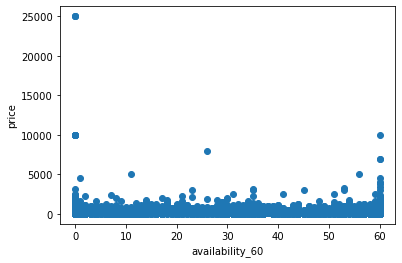

In [146]:
# Visually inspect the relationship between price and availability_60
plt.scatter(ab21_df.availability_60, ab21_df.price )
plt.xlabel('availability_60')
plt.ylabel('price')
plt.show()

In [147]:
# Separate the feature X from the target y:
y = ab21_df["price"]
X = ab21_df.drop(columns="price")

In [148]:
# formats the data to meet the requirements of the Scikit-learn library:
X = ab21_df.availability_60.values.reshape(-1, 1)

In [149]:
# Examine the first five entries in X, the output is a two-dimensional NumPy array:
X[:5]

array([[ 3],
       [60],
       [41],
       [60],
       [38]], dtype=int64)

In [150]:
# Examine the shape of X
X.shape

(12616, 1)

In [151]:
# Assign the target variable, or the price column, to y
y = ab21_df.price

In [152]:
# Create an instance of the linear regression model.
model = LinearRegression()

In [153]:
#After a model is instantiated, it will analyze the data and attempt to learn patterns in the data. 
model.fit(X, y)

LinearRegression()

In [154]:
#Generate prediction
y_pred = model.predict(X)
print(y_pred.shape)

(12616,)


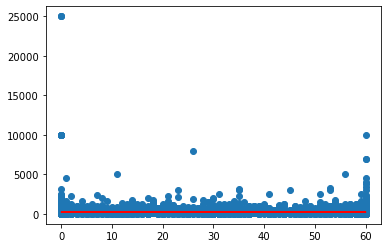

In [155]:
# plot the predictions as a red line against the data points:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()